# XGI in 5 minutes

Hello!

If you're new to XGI, you might want to check out the [XGI in 1 minute tutorial](https://xgi.readthedocs.io/en/stable/api/tutorials/getting_started_1.html) for a quick introduction.

## Getting Started

Let's import XGI in the usual way, and this time we'll need a few other standard Python libraries too.

In [15]:
import matplotlib.pyplot as plt

import xgi

To check the version of XGI you have, simply type:

In [16]:
xgi.__version__

'0.9.4'

## Creating a Random Hypergraph

In XGI, you have several options to create a hypergraph. You can build an empty one and add nodes and edges manually (as we have seen in the [XGI in 1 minute tutorial](https://xgi.readthedocs.io/en/stable/api/tutorials/getting_started_1.html)), or you can use our handy generators. For this tutorial, let's use a simple generator to create a random hypergraph. If you're curious about other generators, feel free to explore the [focus tutorial on generators](https://xgi.readthedocs.io/en/stable/api/tutorials/focus_4.html) or consult the [documentation](https://xgi.readthedocs.io/en/stable/api/generators.html).

To create a random hypergraph, use this function:

In [17]:
N = 20
ps = [0.1, 0.01]
H = xgi.random_hypergraph(N, ps, seed=1)

This function generates a random hypergraph with `N` nodes, connecting any `d+1` nodes with a hyperedge using probability `ps[d-1]`.

You can also print the hypergraph and access the list of nodes and edges like this:

In [18]:
print(H)
print(H.nodes)
print(H.edges.members())

Unnamed Hypergraph with 20 nodes and 34 hyperedges
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[{0, 9}, {0, 10}, {0, 14}, {1, 2}, {1, 3}, {1, 9}, {1, 18}, {3, 6}, {4, 6}, {4, 7}, {12, 5}, {8, 6}, {8, 7}, {19, 7}, {8, 9}, {8, 10}, {8, 16}, {9, 15}, {16, 10}, {17, 10}, {19, 12}, {19, 14}, {17, 15}, {1, 3, 13}, {1, 9, 15}, {1, 19, 14}, {2, 3, 4}, {2, 4, 6}, {16, 17, 4}, {8, 18, 6}, {8, 9, 7}, {8, 11, 19}, {8, 19, 14}, {16, 10, 18}]


## Plotting a random hypergraph

Visualization is crucial for understanding complex data structures. To plot your hypergraph using the default layout, use this:



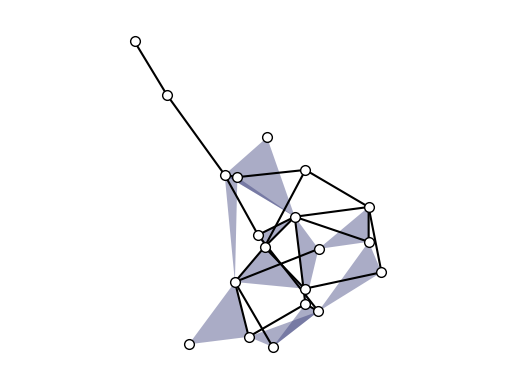

In [19]:
pos = xgi.barycenter_spring_layout(H, seed=1)
xgi.draw(H, pos=pos);

or with `hull=True`for this:

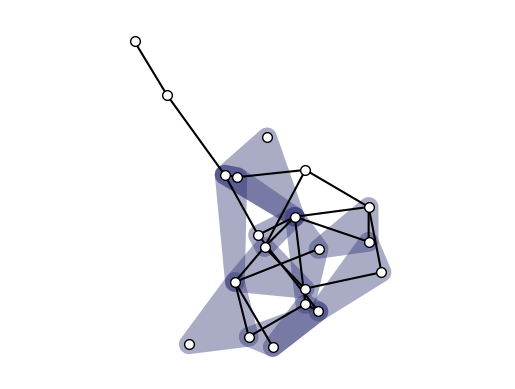

In [20]:
xgi.draw(H, pos=pos, hull=True);

XGI also offers several ways to personalize your plots for higher-order structures. For more options, explore the [focus tutorial on plotting](https://xgi.readthedocs.io/en/stable/api/tutorials/focus_5.html) or consult the [documentation](https://xgi.readthedocs.io/en/stable/api/drawing.html).

For example, you can place the nodes on a circle:

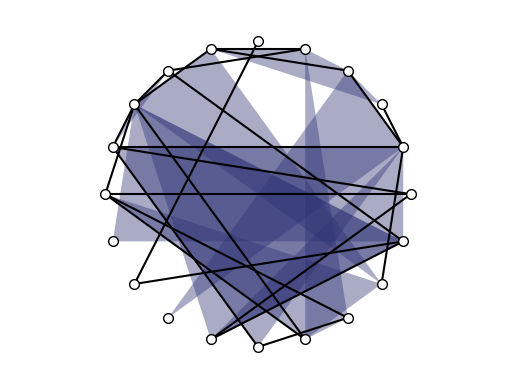

In [21]:
pos_circular = xgi.circular_layout(H)
xgi.draw(H, pos=pos_circular);

Or change the colors of hyperedges and links:

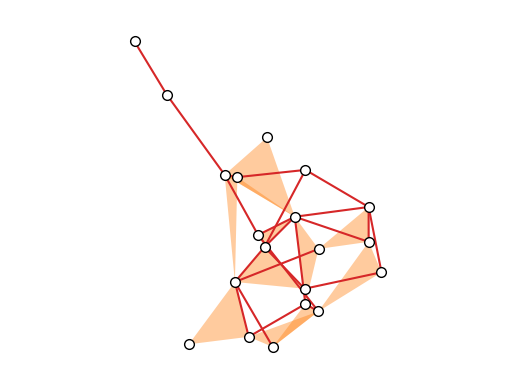

In [22]:
xgi.draw(H, dyad_color="tab:red", edge_fc="tab:orange", pos=pos);

Adding node labels is another handy feature:

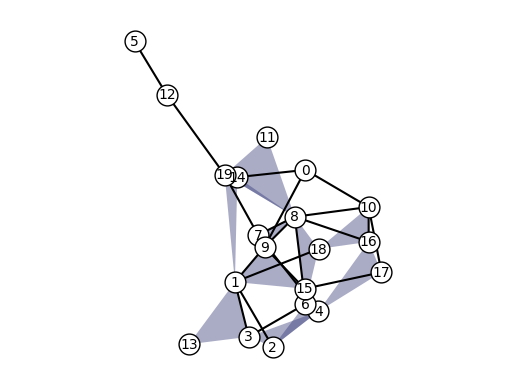

In [23]:
xgi.draw(H, node_labels=True, pos=pos, node_size=15);

## Accessing the maximum order of your hypergraph

You might need to know the maximum number of edges in your hypergraph. To do that, simply use this:

In [24]:
xgi.max_edge_order(H)

2

This can be particularly helpful when working with larger and more complex structures.

## Listing All Edge Sizes

To access all the edge sizes in your hypergraph, use this:


In [25]:
xgi.unique_edge_sizes(H)

[2, 3]

## Histogram of the edge sizes

Let's take things up a notch and perform a more detailed analysis on a hypergraph: plotting a histogram of the edges' orders.

First, let's create a larger and more intricate random hypergraph:

In [26]:
N_new = 50
ps_new = [0.1, 0.01, 0.001, 0.0001]
H_new = xgi.random_hypergraph(N_new, ps_new)

To access the order of the edges, use the `stats` function. For a deeper dive into this, check out the [focus tutorial on statistics](https://xgi.readthedocs.io/en/stable/api/tutorials/focus_6.html) or consult the [documentation](https://xgi.readthedocs.io/en/stable/api/stats.html). You can obtain a list of all the edge orders and then create a histogram in the usual way.

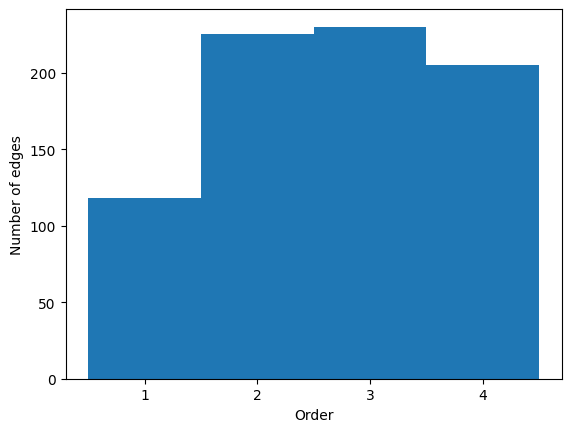

In [27]:
list_of_orders = H_new.edges.order.aslist()
plt.hist(
    list_of_orders,
    bins=range(min(list_of_orders), max(list_of_orders) + 2, 1),
    align="left",
)
plt.xticks(range(min(list_of_orders), max(list_of_orders) + 1, 1))
plt.xlabel("Order")
plt.ylabel("Number of edges");

## Histogram of the Node Degrees

Similarly, using the `stats` function, you can create a histogram of the node degrees in your hypergraph:

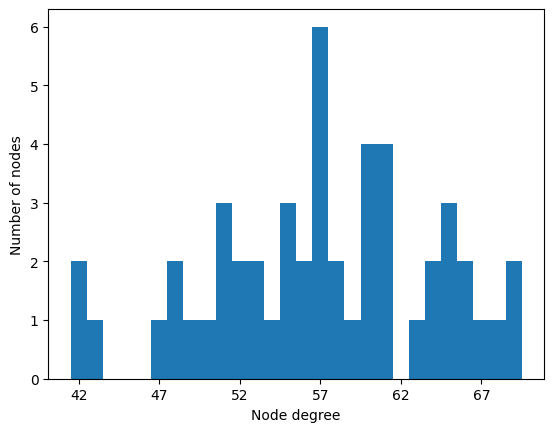

In [28]:
nodes_degrees_list = H_new.nodes.degree.aslist()
plt.hist(
    nodes_degrees_list,
    bins=range(min(nodes_degrees_list), max(nodes_degrees_list) + 1, 1),
    align="left",
)
plt.xticks(range(min(nodes_degrees_list), max(nodes_degrees_list) + 1, 5))
plt.xlabel("Node degree")
plt.ylabel("Number of nodes");

## Wrapping Up

Well done! 👏 You've covered a lot in just 5 minutes with XGI. We hope you enjoyed this tutorial, and there's much more to explore! Check out other tutorials [here](https://xgi.readthedocs.io/en/stable/user_guides.html)!